In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2023-02-16 10:54:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.002s  

2023-02-16 10:54:12 (90.8 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd

df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
import pandas as pd
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Prices (USD)" : "Price"})
bitcoin_prices.head()

,Closing Price (USD)
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


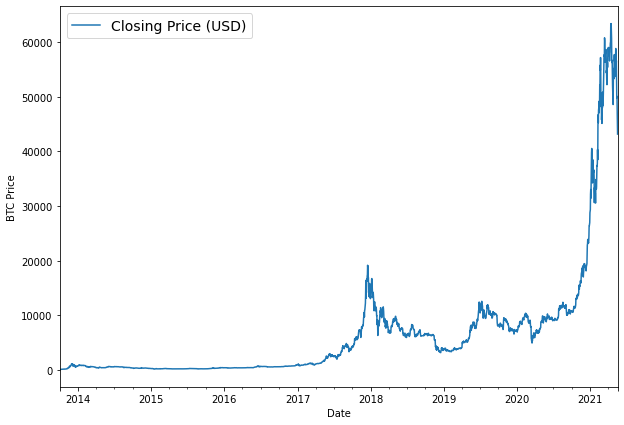

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = (10,7))
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Closing Price (USD)"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
split_size = int(0.8 * len(prices))

X_train , y_train = timesteps[:split_size],prices[:split_size]
X_test , y_test = timesteps[split_size:],prices[split_size:]

len(X_train), len(X_test)

(2229, 558)

In [ ]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end],values[start:end], format, label=label)
  plt.xlabel("Date")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)  

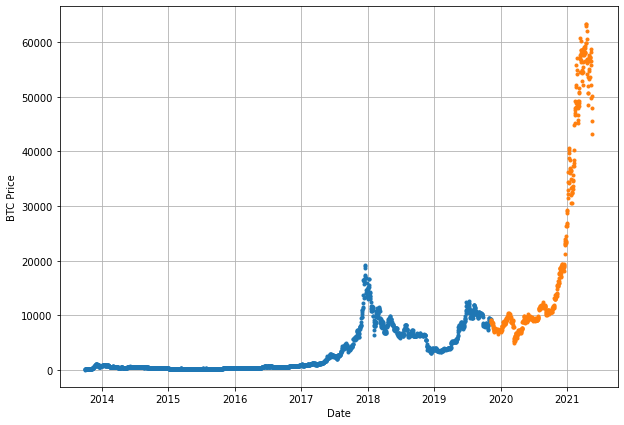

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(X_train, y_train)
plot_time_series(X_test, y_test)

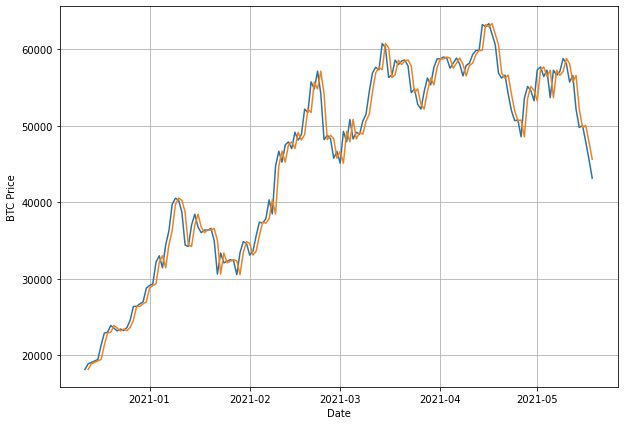

In [ ]:
naive_forecast = y_test[:-1]
plt.figure(figsize = (10,7))
#plot_time_series(X_train,y_train)
plot_time_series(X_test,y_test,start = 400,format= "-")
plot_time_series(X_test[1:],naive_forecast,start=400,format = "-")

In [ ]:
import tensorflow as tf

In [ ]:
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_seaon = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive_no_seaon

In [ ]:
mean_absolute_scaled_error(y_test[1:],naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae: ": mae.numpy(),
          "mse: ": mse.numpy(),
          "rmse: ": rmse.numpy(),
          "mape: ": mape.numpy(),
          "mase: ": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_test[1:],
                               naive_forecast)
naive_results

{'mae: ': 567.9802,
 'mse: ': 1147547.0,
 'rmse: ': 1071.2362,
 'mape: ': 2.516525,
 'mase: ': 0.99957}

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_labeled_windows(x, horizon = HORIZON):
  return x[:, :-horizon], x[:,-horizon:]

In [ ]:
test_window, test_label = get_labeled_windows(tf.expand_dims(tf.range(8)+1,axis = 0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [ ]:
import numpy as np

def make_windows(x, window_size=WINDOW_SIZE,horizon = HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon),axis = 0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  windowed_array = x[window_indexes]
  windows, labels = get_labeled_windows(windowed_array, horizon = horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices)

In [ ]:
def make_train_test_split(windows, labels, test_split = 0.2):
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, train_labels, test_windows, test_labels

In [ ]:
train_windows, train_labels, test_windows, test_labels = make_train_test_split(full_windows, full_labels)

In [ ]:
import os

def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path,model_name),
                                            verbose = 0,
                                            save_best_only = True)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear")
], name = "model1")

model1.compile(loss="mae",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae", "mse"])

model1.fit(x = train_windows,
           y = train_labels,
           epochs = 100,
           verbose = 1,
           batch_size = 128,
           validation_data = (test_windows, test_labels),
           callbacks = [create_model_checkpoint(model_name = model1.name)])

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 1201.7340 - mae: 1201.7340 - mse: 4640795.0000   

18/18 [==============================] - 9s 102ms/step - loss: 942.7469 - mae: 942.7469 - mse: 3346342.5000 - val_loss: 2557.0901 - val_mae: 2557.0901 - val_mse: 15481390.0000
Epoch 2/100
13/18 [====================>.........] - ETA: 0s - loss: 283.0285 - mae: 283.0285 - mse: 359670.6562

18/18 [==============================] - 1s 64ms/step - loss: 264.0478 - mae: 264.0478 - mse: 314956.6250 - val_loss: 1025.3551 - val_mae: 1025.3551 - val_mse: 3554889.5000
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 189.3562 - mae: 189.3562 - mse: 172582.4531

18/18 [==============================] - 1s 66ms/step - loss: 188.0542 - mae: 188.0542 - mse: 172763.6250 - val_loss: 980.4793 - val_mae: 980.4793 - val_mse: 3191377.0000
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 192.1410 - mae: 192.1410 - mse: 192537.0938

18/18 [==============================] - 1s 59ms/step - loss: 178.5625 - mae: 178.5625 - mse: 165564.2031 - val_loss: 950.3069 - val_mae: 950.3069 - val_mse: 3023049.2500
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 171.1148 - mae: 171.1148 - mse: 155579.3906 - val_loss: 966.5809 - val_mae: 966.5809 - val_mse: 2899747.0000
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 161.5033 - mae: 161.5033 - mse: 129327.2891

18/18 [==============================] - 1s 57ms/step - loss: 162.3550 - mae: 162.3550 - mse: 140489.6719 - val_loss: 875.5972 - val_mae: 875.5972 - val_mse: 2608007.2500
Epoch 7/100
10/18 [===============>..............] - ETA: 0s - loss: 168.5269 - mae: 168.5269 - mse: 154823.3438

18/18 [==============================] - 2s 113ms/step - loss: 153.3209 - mae: 153.3209 - mse: 127369.2656 - val_loss: 832.5360 - val_mae: 832.5360 - val_mse: 2309405.2500
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 147.2971 - mae: 147.2971 - mse: 119131.2500

18/18 [==============================] - 1s 84ms/step - loss: 147.4208 - mae: 147.4208 - mse: 118423.4062 - val_loss: 807.8100 - val_mae: 807.8100 - val_mse: 2212888.7500
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 144.1363 - mae: 144.1363 - mse: 114883.4297

18/18 [==============================] - 1s 57ms/step - loss: 144.1363 - mae: 144.1363 - mse: 114883.4297 - val_loss: 798.4755 - val_mae: 798.4755 - val_mse: 2046352.1250
Epoch 10/100
11/18 [=================>............] - ETA: 0s - loss: 136.0072 - mae: 136.0072 - mse: 97166.6016 

18/18 [==============================] - 1s 53ms/step - loss: 138.8298 - mae: 138.8298 - mse: 107693.1328 - val_loss: 751.9940 - val_mae: 751.9940 - val_mse: 1904399.3750
Epoch 11/100
10/18 [===============>..............] - ETA: 0s - loss: 133.0463 - mae: 133.0463 - mse: 103927.7500

18/18 [==============================] - 1s 64ms/step - loss: 134.0654 - mae: 134.0654 - mse: 100542.7188 - val_loss: 742.6982 - val_mae: 742.6982 - val_mse: 1816389.1250
Epoch 12/100
18/18 [==============================] - 0s 11ms/step - loss: 132.7483 - mae: 132.7483 - mse: 97994.1875 - val_loss: 782.8944 - val_mae: 782.8944 - val_mse: 1885778.5000
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 132.8071 - mae: 132.8071 - mse: 97638.7891 

18/18 [==============================] - 1s 78ms/step - loss: 132.5598 - mae: 132.5598 - mse: 96675.5000 - val_loss: 712.4259 - val_mae: 712.4259 - val_mse: 1681997.5000
Epoch 14/100
16/18 [=========================>....] - ETA: 0s - loss: 126.0943 - mae: 126.0943 - mse: 90258.4844

18/18 [==============================] - 1s 68ms/step - loss: 127.9458 - mae: 127.9458 - mse: 92687.5781 - val_loss: 699.0450 - val_mae: 699.0450 - val_mse: 1627071.7500
Epoch 15/100
10/18 [===============>..............] - ETA: 0s - loss: 127.9711 - mae: 127.9711 - mse: 91270.3594

18/18 [==============================] - 1s 55ms/step - loss: 129.3127 - mae: 129.3127 - mse: 91154.1484 - val_loss: 689.7532 - val_mae: 689.7532 - val_mse: 1584541.7500
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 122.9487 - mae: 122.9487 - mse: 85722.6875

18/18 [==============================] - 1s 49ms/step - loss: 122.9487 - mae: 122.9487 - mse: 85722.6875 - val_loss: 682.5946 - val_mae: 682.5946 - val_mse: 1551636.2500
Epoch 17/100
13/18 [====================>.........] - ETA: 0s - loss: 124.2452 - mae: 124.2452 - mse: 87982.2031

18/18 [==============================] - 1s 60ms/step - loss: 122.4086 - mae: 122.4086 - mse: 86556.1641 - val_loss: 677.2518 - val_mae: 677.2518 - val_mse: 1527349.6250
Epoch 18/100
10/18 [===============>..............] - ETA: 0s - loss: 126.2755 - mae: 126.2755 - mse: 91885.2031

18/18 [==============================] - 1s 55ms/step - loss: 121.0101 - mae: 121.0101 - mse: 84263.3438 - val_loss: 653.7668 - val_mae: 653.7668 - val_mse: 1476159.2500
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 121.0425 - mae: 121.0425 - mse: 84031.9766 - val_loss: 722.5798 - val_mae: 722.5798 - val_mse: 1622356.1250
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 122.6499 - mae: 122.6499 - mse: 82456.8594

18/18 [==============================] - 1s 32ms/step - loss: 121.1260 - mae: 121.1260 - mse: 80870.5938 - val_loss: 638.7950 - val_mae: 638.7950 - val_mse: 1410360.3750
Epoch 21/100
14/18 [======================>.......] - ETA: 0s - loss: 118.6439 - mae: 118.6439 - mse: 78071.7734

18/18 [==============================] - 1s 42ms/step - loss: 119.9440 - mae: 119.9440 - mse: 81745.7422 - val_loss: 632.4047 - val_mae: 632.4047 - val_mse: 1397962.3750
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 125.4061 - mae: 125.4061 - mse: 92364.7656 

18/18 [==============================] - 1s 42ms/step - loss: 117.3881 - mae: 117.3881 - mse: 80442.9297 - val_loss: 624.4918 - val_mae: 624.4918 - val_mse: 1364445.3750
Epoch 23/100
14/18 [======================>.......] - ETA: 0s - loss: 118.3632 - mae: 118.3632 - mse: 75374.4375

18/18 [==============================] - 1s 42ms/step - loss: 118.8939 - mae: 118.8939 - mse: 80396.6172 - val_loss: 624.2714 - val_mae: 624.2714 - val_mse: 1356182.3750
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 121.0475 - mae: 121.0475 - mse: 82590.0625 - val_loss: 627.4811 - val_mae: 627.4811 - val_mse: 1380225.8750
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 115.9313 - mae: 115.9313 - mse: 76474.7188

18/18 [==============================] - 1s 41ms/step - loss: 115.9313 - mae: 115.9313 - mse: 76474.7188 - val_loss: 623.4229 - val_mae: 623.4229 - val_mse: 1364838.6250
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 115.2228 - mae: 115.2228 - mse: 65829.8203

18/18 [==============================] - 0s 27ms/step - loss: 118.8843 - mae: 118.8843 - mse: 78662.6250 - val_loss: 622.3065 - val_mae: 622.3065 - val_mse: 1359657.7500
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 160.3194 - mae: 160.3194 - mse: 126779.0000

18/18 [==============================] - 0s 28ms/step - loss: 119.8260 - mae: 119.8260 - mse: 79010.1406 - val_loss: 614.3635 - val_mae: 614.3635 - val_mse: 1333373.7500
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 105.7601 - mae: 105.7601 - mse: 66434.6719

18/18 [==============================] - 0s 29ms/step - loss: 113.0005 - mae: 113.0005 - mse: 75291.9141 - val_loss: 609.6381 - val_mae: 609.6381 - val_mse: 1304196.8750
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 104.3973 - mae: 104.3973 - mse: 82357.5547

18/18 [==============================] - 0s 29ms/step - loss: 112.8749 - mae: 112.8749 - mse: 74970.7266 - val_loss: 607.3126 - val_mae: 607.3126 - val_mse: 1308579.5000
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 131.8970 - mae: 131.8970 - mse: 96331.0000

18/18 [==============================] - 0s 29ms/step - loss: 115.7036 - mae: 115.7036 - mse: 76976.5703 - val_loss: 600.1526 - val_mae: 600.1526 - val_mse: 1282942.1250
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3267 - mae: 111.3267 - mse: 72707.8672 - val_loss: 619.3353 - val_mae: 619.3353 - val_mse: 1309553.1250
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 111.7146 - mae: 111.7146 - mse: 77310.1953

18/18 [==============================] - 0s 28ms/step - loss: 112.1802 - mae: 112.1802 - mse: 75447.2188 - val_loss: 594.8136 - val_mae: 594.8136 - val_mse: 1267418.8750
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 111.7803 - mae: 111.7803 - mse: 74358.8438 - val_loss: 611.2510 - val_mae: 611.2510 - val_mse: 1287998.6250
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 131.9280 - mae: 131.9280 - mse: 117676.4219

18/18 [==============================] - 0s 28ms/step - loss: 110.4302 - mae: 110.4302 - mse: 73570.6797 - val_loss: 592.6445 - val_mae: 592.6445 - val_mse: 1261461.3750
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 98.3035 - mae: 98.3035 - mse: 55914.1953

18/18 [==============================] - 0s 28ms/step - loss: 109.2926 - mae: 109.2926 - mse: 72013.1641 - val_loss: 592.5608 - val_mae: 592.5608 - val_mse: 1259707.1250
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2550 - mae: 115.2550 - mse: 75275.2109 - val_loss: 605.0717 - val_mae: 605.0717 - val_mse: 1268276.8750
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6500 - mae: 112.6500 - mse: 74650.9297 - val_loss: 634.0919 - val_mae: 634.0919 - val_mse: 1355852.1250
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 111.2609 - mae: 111.2609 - mse: 73452.0312

18/18 [==============================] - 0s 29ms/step - loss: 111.2609 - mae: 111.2609 - mse: 73452.0312 - val_loss: 584.4849 - val_mae: 584.4849 - val_mse: 1233751.6250
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 124.2048 - mae: 124.2048 - mse: 99224.2734

18/18 [==============================] - 0s 29ms/step - loss: 108.8108 - mae: 108.8108 - mse: 71677.6562 - val_loss: 582.7198 - val_mae: 582.7198 - val_mse: 1229838.2500
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9081 - mae: 107.9081 - mse: 70372.6016 - val_loss: 588.8198 - val_mae: 588.8198 - val_mse: 1242649.5000
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1669 - mae: 108.1669 - mse: 70903.3203 - val_loss: 620.5465 - val_mae: 620.5465 - val_mse: 1314171.7500
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 113.2795 - mae: 113.2795 - mse: 74210.6875 - val_loss: 600.8487 - val_mae: 600.8487 - val_mse: 1249402.2500
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4620 - mae: 110.4620 - mse: 70275.0547 - val_loss: 620.2373 - val_mae: 620.2373 - val_mse: 1309216.0000
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 68.9873 - mae: 68.9873 - mse: 18

18/18 [==============================] - 0s 28ms/step - loss: 110.9884 - mae: 110.9884 - mse: 71004.4922 - val_loss: 580.7319 - val_mae: 580.7319 - val_mse: 1214843.1250
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2997 - mae: 107.2997 - mse: 70179.6797 - val_loss: 599.0076 - val_mae: 599.0076 - val_mse: 1257840.7500
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 108.3385 - mae: 108.3385 - mse: 69407.9844 - val_loss: 622.7109 - val_mae: 622.7109 - val_mse: 1285832.6250
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1216 - mae: 111.1216 - mse: 72827.1016 - val_loss: 613.6698 - val_mae: 613.6698 - val_mse: 1267525.3750
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6282 - mae: 108.6282 - mse: 71206.7031 - val_loss: 610.7709 - val_mae: 610.7709 - val_mse: 1261942.0000
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6126 - mae: 109.6126 - m

18/18 [==============================] - 1s 42ms/step - loss: 109.7935 - mae: 109.7935 - mse: 69784.7578 - val_loss: 578.2786 - val_mae: 578.2786 - val_mse: 1203923.1250
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 125.9834 - mae: 125.9834 - mse: 98027.9688

18/18 [==============================] - 0s 28ms/step - loss: 114.2358 - mae: 114.2358 - mse: 75699.1406 - val_loss: 572.6414 - val_mae: 572.6414 - val_mse: 1193997.0000
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6366 - mae: 107.6366 - mse: 69492.7344 - val_loss: 727.5750 - val_mae: 727.5750 - val_mse: 1608142.2500
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 119.0898 - mae: 119.0898 - mse: 77156.1875 - val_loss: 647.5605 - val_mae: 647.5605 - val_mse: 1363929.1250
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6818 - mae: 113.6818 - mse: 71126.3125 - val_loss: 602.9122 - val_mae: 602.9122 - val_mse: 1238932.2500
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6417 - mae: 110.6417 - mse: 70773.7734 - val_loss: 599.2566 - val_mae: 599.2566 - val_mse: 1247572.7500
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4384 - mae: 109.4384 - m

18/18 [==============================] - 1s 43ms/step - loss: 106.9605 - mae: 106.9605 - mse: 69264.4062 - val_loss: 570.5397 - val_mae: 570.5397 - val_mse: 1182431.2500
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 105.8263 - mae: 105.8263 - mse: 68702.6562 - val_loss: 578.8710 - val_mae: 578.8710 - val_mse: 1190533.1250
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 105.9323 - mae: 105.9323 - mse: 68203.2656 - val_loss: 669.1758 - val_mae: 669.1758 - val_mse: 1422411.7500
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 110.4015 - mae: 110.4015 - mse: 67434.6797 - val_loss: 652.5844 - val_mae: 652.5844 - val_mse: 1375885.7500
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 121.1493 - mae: 121.1493 - mse: 76854.9844 - val_loss: 575.2639 - val_mae: 575.2639 - val_mse: 1190389.8750
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 128.8273 - mae: 128.8273 - m

18/18 [==============================] - 1s 39ms/step - loss: 107.9783 - mae: 107.9783 - mse: 69409.5625 - val_loss: 566.8311 - val_mae: 566.8311 - val_mse: 1171772.0000
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 109.2888 - mae: 109.2888 - mse: 70140.5000 - val_loss: 612.5270 - val_mae: 612.5270 - val_mse: 1273919.1250
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 105.8270 - mae: 105.8270 - mse: 69217.4297 - val_loss: 569.4410 - val_mae: 569.4410 - val_mse: 1177554.7500
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0207 - mae: 106.0207 - mse: 68795.7891 - val_loss: 569.8792 - val_mae: 569.8792 - val_mse: 1173548.8750
Epoch 76/100
16/18 [=========================>....] - ETA: 0s - loss: 108.0852 - mae: 108.0852 - mse: 69545.1094

18/18 [==============================] - 1s 30ms/step - loss: 107.4377 - mae: 107.4377 - mse: 69376.0547 - val_loss: 566.5351 - val_mae: 566.5351 - val_mse: 1168582.5000
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 106.2551 - mae: 106.2551 - mse: 68194.1562 - val_loss: 570.4701 - val_mae: 570.4701 - val_mse: 1179255.6250
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 106.9053 - mae: 106.9053 - mse: 67800.8594 - val_loss: 597.4406 - val_mae: 597.4406 - val_mse: 1236701.5000
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 107.1749 - mae: 107.1749 - mse: 70379.9375 - val_loss: 582.8726 - val_mae: 582.8726 - val_mse: 1203496.1250
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9060 - mae: 106.9060 - mse: 69455.1328 - val_loss: 578.8962 - val_mae: 578.8962 - val_mse: 1183403.0000
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 104.9632 - mae: 104.9632 - m

18/18 [==============================] - 0s 28ms/step - loss: 106.6585 - mae: 106.6585 - mse: 68637.9141 - val_loss: 565.8549 - val_mae: 565.8549 - val_mse: 1160296.3750
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1509 - mae: 114.1509 - mse: 70167.6094 - val_loss: 682.7609 - val_mae: 682.7609 - val_mse: 1407225.5000


In [ ]:
naive_results

{'mae: ': 567.9802,
 'mse: ': 1147547.0,
 'rmse: ': 1071.2362,
 'mape: ': 2.516525,
 'mase: ': 0.99957}

In [ ]:
model1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 682.7609 - mae: 682.7609 - mse: 1407225.5000


[682.7608642578125, 682.7608642578125, 1407225.5]

In [ ]:
model1 = tf.keras.models.load_model("/content/model_experiments/model1")
model1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 565.8549 - mae: 565.8549 - mse: 1160296.3750


[565.8548583984375, 565.8548583984375, 1160296.375]

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model1_preds = make_preds(model1,test_windows)
model1_preds[-10:]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([56955.562, 58733.887, 58247.926, 56171.03 , 56265.473, 52698.16 ,
       49968.758, 49805.57 , 48300.758, 46299.176], dtype=float32)>

In [ ]:
test_labels[-10:]

array([[58788.20967893],
       [58102.19142623],
       [55715.54665129],
       [56573.5554719 ],
       [52147.82118698],
       [49764.1320816 ],
       [50032.69313676],
       [47885.62525472],
       [45604.61575361],
       [43144.47129086]])

In [ ]:
model1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                y_pred = model1_preds)
model1_results

{'mae: ': 565.8549,
 'mse: ': 1160296.5,
 'rmse: ': 1077.1707,
 'mape: ': 2.541356,
 'mase: ': 0.9940504}

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon = HORIZON)

In [ ]:
train_windows, train_labels, test_windows, test_labels = make_train_test_split(windows = full_windows,
                                                                               labels = full_labels,
                                                                               test_split = 0.2)

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name = "model2")

model2.compile(loss = "mae",
               optimizer = tf.keras.optimizers.Adam())

model2.fit(x = train_windows,
           y = train_labels,
           epochs = 100,
           verbose = 1,
           batch_size = 128,
           validation_data = (test_windows, test_labels),
           callbacks = [create_model_checkpoint(model_name = model2.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 13s - loss: 3645.3972

18/18 [==============================] - 1s 34ms/step - loss: 1293.3903 - val_loss: 5018.1069
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 753.8868

18/18 [==============================] - 1s 32ms/step - loss: 411.1471 - val_loss: 1467.4015
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 280.5905

18/18 [==============================] - 1s 40ms/step - loss: 277.0626 - val_loss: 1432.2299
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 246.5786

18/18 [==============================] - 1s 38ms/step - loss: 248.1962 - val_loss: 1318.0493
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 238.8613 - val_loss: 1369.5320
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 230.9469 - val_loss: 1499.0709
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 228.3138

18/18 [==============================] - 1s 33ms/step - loss: 227.3636 - val_loss: 1243.0947
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 227.8857

18/18 [==============================] - 1s 42ms/step - loss: 221.5477 - val_loss: 1171.6353
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 214.5496

18/18 [==============================] - 0s 28ms/step - loss: 207.3815 - val_loss: 1116.4271
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 277.8888

18/18 [==============================] - 0s 26ms/step - loss: 197.3094 - val_loss: 1092.1465
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 186.1907 - val_loss: 1438.6038
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 182.8228

18/18 [==============================] - 0s 26ms/step - loss: 208.2255 - val_loss: 1018.5889
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 180.7701

18/18 [==============================] - 0s 26ms/step - loss: 182.2769 - val_loss: 975.5119
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 176.3082

18/18 [==============================] - 0s 26ms/step - loss: 176.3082 - val_loss: 910.2264
Epoch 15/100
18/18 [==============================] - 0s 4ms/step - loss: 186.2560 - val_loss: 1501.7007
Epoch 16/100
18/18 [==============================] - 0s 4ms/step - loss: 203.0939 - val_loss: 1072.9744
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 180.5144 - val_loss: 1268.2489
Epoch 18/100
18/18 [==============================] - 0s 4ms/step - loss: 180.2689 - val_loss: 1196.8538
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 200.2361

18/18 [==============================] - 0s 27ms/step - loss: 167.9321 - val_loss: 856.4764
Epoch 20/100
18/18 [==============================] - 0s 4ms/step - loss: 160.4422 - val_loss: 1080.0314
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 159.2876 - val_loss: 1078.6598
Epoch 22/100
18/18 [==============================] - 0s 4ms/step - loss: 199.7291 - val_loss: 1099.0317
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 235.4012

18/18 [==============================] - 0s 26ms/step - loss: 164.3371 - val_loss: 802.4242
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 156.1090 - val_loss: 848.0191
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 157.6300

18/18 [==============================] - 0s 28ms/step - loss: 157.4565 - val_loss: 785.7128
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 143.8226 - val_loss: 894.9481
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 142.5273

18/18 [==============================] - 0s 28ms/step - loss: 144.9597 - val_loss: 763.3558
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 153.7009 - val_loss: 786.1817
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 176.9436

18/18 [==============================] - 0s 26ms/step - loss: 157.1863 - val_loss: 741.8884
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 126.6654

18/18 [==============================] - 0s 26ms/step - loss: 145.8251 - val_loss: 738.3792
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 140.1199

18/18 [==============================] - 0s 26ms/step - loss: 178.9081 - val_loss: 735.7626
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 137.2567 - val_loss: 872.8168
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 156.6780

18/18 [==============================] - 0s 26ms/step - loss: 137.4845 - val_loss: 723.7597
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 135.8066 - val_loss: 756.3486
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 138.3884 - val_loss: 822.0301
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 133.9864 - val_loss: 816.0676
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 167.4781

18/18 [==============================] - 1s 39ms/step - loss: 135.8835 - val_loss: 717.7017
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 138.8270 - val_loss: 782.2703
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 154.0418

18/18 [==============================] - 0s 27ms/step - loss: 137.9827 - val_loss: 699.2151
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 133.7895 - val_loss: 816.1225
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 141.0161 - val_loss: 761.9982
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 129.8714 - val_loss: 705.8665
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 127.7896 - val_loss: 699.6625
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 138.7483 - val_loss: 713.6495
Epoch 45/100
18/18 [==============================] - 0s 8ms/step - loss: 141.1138 - val_loss: 748.4324
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 144.7810 - val_loss: 769.5880
Epoch 47/100
14/18 [======================>.......] - ETA: 0s - loss: 129.1969

18/18 [==============================] - 1s 40ms/step - loss: 129.4190 - val_loss: 681.5948
Epoch 48/100
15/18 [========================>.....] - ETA: 0s - loss: 125.1712

18/18 [==============================] - 1s 87ms/step - loss: 126.4223 - val_loss: 680.3669
Epoch 49/100
18/18 [==============================] - 0s 11ms/step - loss: 130.6550 - val_loss: 699.3020
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 151.4319 - val_loss: 1165.7235
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 141.4821 - val_loss: 759.6653
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 134.9376 - val_loss: 770.4657
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 145.3033 - val_loss: 1145.7047
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 150.5576 - val_loss: 798.7332
Epoch 55/100
18/18 [==============================] - 0s 16ms/step - loss: 129.4330 - val_loss: 709.8780
Epoch 56/100
18/18 [==============================] - ETA: 0s - loss: 124.9626

18/18 [==============================] - 1s 51ms/step - loss: 124.9626 - val_loss: 677.1234
Epoch 57/100
 1/18 [>.............................] - ETA: 0s - loss: 124.1549

18/18 [==============================] - 1s 63ms/step - loss: 127.0711 - val_loss: 652.5590
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 131.5820 - val_loss: 676.5453
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 109.2622

18/18 [==============================] - 0s 27ms/step - loss: 168.5559 - val_loss: 651.2885
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 139.4521 - val_loss: 718.1109
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 124.0497 - val_loss: 669.3911
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 153.7217 - val_loss: 1028.4637
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 149.0405 - val_loss: 828.2221
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 148.8170 - val_loss: 725.9061
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 131.8955 - val_loss: 692.1670
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 127.5825 - val_loss: 653.0307
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 120.4220 - val_loss: 727.5728
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 1

18/18 [==============================] - 0s 27ms/step - loss: 128.2064 - val_loss: 633.0316
Epoch 75/100
 1/18 [>.............................] - ETA: 0s - loss: 112.5284

18/18 [==============================] - 0s 26ms/step - loss: 118.9532 - val_loss: 630.4830
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 116.9553 - val_loss: 735.6418
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 128.4700 - val_loss: 732.8408
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 127.0398 - val_loss: 758.3768
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 127.9387 - val_loss: 662.0232
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 124.7797 - val_loss: 817.3276
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 124.0300 - val_loss: 662.4332
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 119.5105 - val_loss: 884.9294
Epoch 83/100
 1/18 [>.............................] - ETA: 0s - loss: 110.2719

18/18 [==============================] - 0s 27ms/step - loss: 130.9319 - val_loss: 629.5487
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 125.3515 - val_loss: 1048.5071
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 142.5177 - val_loss: 935.1952
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 127.6752 - val_loss: 658.7876
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 125.2282 - val_loss: 637.6801
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 132.4453 - val_loss: 1168.4081
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 143.4821 - val_loss: 652.0748
Epoch 90/100
 1/18 [>.............................] - ETA: 0s - loss: 97.6315

18/18 [==============================] - 0s 25ms/step - loss: 124.1440 - val_loss: 628.8036
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0183 - val_loss: 638.8461
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 117.3281 - val_loss: 844.9891
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 135.5304 - val_loss: 692.0555
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 116.7862 - val_loss: 684.2883
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 128.7052 - val_loss: 708.4619
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 119.9434 - val_loss: 633.1582
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 138.7594 - val_loss: 682.9059
Epoch 98/100
 1/18 [>.............................] - ETA: 0s - loss: 109.1206

18/18 [==============================] - 0s 27ms/step - loss: 127.6716 - val_loss: 626.3011
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6990 - val_loss: 627.1669
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 123.2681 - val_loss: 655.4352


In [ ]:
model2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 655.4352


655.4352416992188

In [ ]:
model2 = tf.keras.models.load_model("/content/model_experiments/model2")
model2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 626.3010


626.3009643554688

In [ ]:
model2_preds = make_preds(model2, test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                y_pred = model2_preds)
model2_results

{'mae: ': 626.301,
 'mse: ': 1318180.0,
 'rmse: ': 1148.1201,
 'mape: ': 2.8301668,
 'mase: ': 1.0947803}

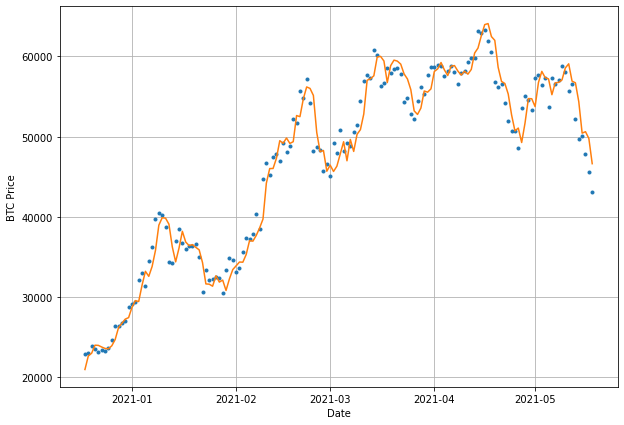

In [ ]:
offset = 400
plt.figure(figsize = (10,7))
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:,0], start = offset)
plot_time_series(timesteps = X_test[-len(test_windows):], values = model2_preds, start = offset, format = "-")

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon = HORIZON)

train_windows, train_labels, test_windows, test_labels = make_train_test_split(windows = full_windows,
                                                                               labels = full_labels,
                                                                               test_split = 0.2)

In [ ]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name = "model3")

model3.compile(loss = "mae",
               optimizer = tf.keras.optimizers.Adam())

model3.fit(x = train_windows,
           y = train_labels,
           epochs = 100,
           verbose = 1,
           batch_size = 128,
           validation_data = (test_windows, test_labels),
           callbacks = [create_model_checkpoint(model_name = model3.name)])

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 2378.7415 

18/18 [==============================] - 2s 66ms/step - loss: 2091.2039 - val_loss: 3395.4878
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 592.2217

18/18 [==============================] - 0s 28ms/step - loss: 592.2217 - val_loss: 2725.7297
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 413.6656

18/18 [==============================] - 0s 28ms/step - loss: 441.2083 - val_loss: 2153.0879
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 454.9269

18/18 [==============================] - 0s 28ms/step - loss: 393.3763 - val_loss: 1986.3357
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 365.1718 - val_loss: 2156.9092
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 348.8859

18/18 [==============================] - 0s 27ms/step - loss: 347.9987 - val_loss: 1868.8905
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 300.9689

18/18 [==============================] - 0s 26ms/step - loss: 328.7633 - val_loss: 1623.6578
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 321.7687 - val_loss: 1676.1075
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 308.1581 - val_loss: 1752.6522
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 263.3430

18/18 [==============================] - 0s 27ms/step - loss: 303.2683 - val_loss: 1550.5551
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 297.0745

18/18 [==============================] - 0s 26ms/step - loss: 290.7392 - val_loss: 1495.6173
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 281.8607 - val_loss: 1591.4203
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 243.8582

18/18 [==============================] - 0s 27ms/step - loss: 278.4110 - val_loss: 1470.8049
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 255.1705

18/18 [==============================] - 0s 27ms/step - loss: 275.8275 - val_loss: 1468.8112
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 275.2436 - val_loss: 1498.4403
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 264.7730

18/18 [==============================] - 0s 26ms/step - loss: 269.3135 - val_loss: 1445.7246
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 267.2354 - val_loss: 1557.8353
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 265.9377 - val_loss: 1559.6622
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 264.4259 - val_loss: 1636.7335
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 269.8379 - val_loss: 1452.0094
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 258.4065 - val_loss: 1473.0320
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 328.1202

18/18 [==============================] - 0s 27ms/step - loss: 257.9943 - val_loss: 1395.8206
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 270.7148

18/18 [==============================] - 0s 25ms/step - loss: 259.9456 - val_loss: 1372.2620
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 268.6263 - val_loss: 1398.8549
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 255.9527 - val_loss: 1466.0823
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 251.1255 - val_loss: 1405.0045
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 250.7739 - val_loss: 1437.8790
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 248.0579 - val_loss: 1421.5869
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 251.3572 - val_loss: 1497.7665
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 249.2151 - val_loss: 1383.9110
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 216.0930

18/18 [==============================] - 0s 27ms/step - loss: 246.4074 - val_loss: 1361.6643
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 241.3097

18/18 [==============================] - 0s 26ms/step - loss: 247.0613 - val_loss: 1350.3729
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 244.2692 - val_loss: 1360.3298
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 244.5307 - val_loss: 1411.6235
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 247.0710 - val_loss: 1424.9648
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 246.9180 - val_loss: 1412.1060
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 261.2751 - val_loss: 1359.3229
Epoch 38/100
18/18 [==============================] - 0s 4ms/step - loss: 242.6378 - val_loss: 1358.3861
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 242.9123 - val_loss: 1365.2273
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 240.4429 - val_loss: 1483.6969
Epoch 41/100
18/18 [==============================] - 0s 4ms/step -

18/18 [==============================] - 0s 26ms/step - loss: 241.6233 - val_loss: 1331.4813
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 287.9885

18/18 [==============================] - 1s 48ms/step - loss: 240.0544 - val_loss: 1311.7899
Epoch 44/100
18/18 [==============================] - 0s 7ms/step - loss: 238.2311 - val_loss: 1329.6833
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 239.6020 - val_loss: 1513.5312
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 244.1453 - val_loss: 1330.5597
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 240.4657 - val_loss: 1334.5381
Epoch 48/100
18/18 [==============================] - 0s 7ms/step - loss: 239.4132 - val_loss: 1311.8633
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 246.1743 - val_loss: 1422.3069
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 238.8587 - val_loss: 1318.2271
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 233.3405 - val_loss: 1449.0481
Epoch 52/100
18/18 [==============================] - 0s 7ms/step -

18/18 [==============================] - 1s 42ms/step - loss: 232.6148 - val_loss: 1301.3350
Epoch 54/100
16/18 [=========================>....] - ETA: 0s - loss: 237.4265

18/18 [==============================] - 0s 28ms/step - loss: 237.7780 - val_loss: 1280.3573
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 233.4269 - val_loss: 1294.3085
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 231.9253 - val_loss: 1304.7783
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 234.2999 - val_loss: 1293.0222
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 234.5330 - val_loss: 1287.9055
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 238.1067 - val_loss: 1307.5229
Epoch 60/100
 1/18 [>.............................] - ETA: 0s - loss: 213.6971

18/18 [==============================] - 0s 26ms/step - loss: 229.4662 - val_loss: 1280.2761
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 231.2927 - val_loss: 1431.8372
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 346.3415

18/18 [==============================] - 0s 27ms/step - loss: 237.5138 - val_loss: 1277.1593
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 234.0900 - val_loss: 1338.0980
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 256.5590

18/18 [==============================] - 0s 27ms/step - loss: 233.5773 - val_loss: 1267.0818
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 231.8463 - val_loss: 1347.2806
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 231.2800 - val_loss: 1610.0857
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 243.4943 - val_loss: 1318.6798
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 235.3944 - val_loss: 1271.0164
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 230.2360 - val_loss: 1585.5295
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 282.8522

18/18 [==============================] - 0s 26ms/step - loss: 233.7437 - val_loss: 1264.7233
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 232.0056 - val_loss: 1300.7972
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 291.6022

18/18 [==============================] - 0s 26ms/step - loss: 231.0457 - val_loss: 1241.7144
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 226.8351 - val_loss: 1267.7549
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 227.2284 - val_loss: 1305.5483
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 227.1224 - val_loss: 1472.0336
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 229.3266 - val_loss: 1325.2250
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 226.9067 - val_loss: 1282.4066
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 228.0808 - val_loss: 1257.6257
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 231.7418 - val_loss: 1246.0542
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 228.7800 - val_loss: 1304.6901
Epoch 81/100
18/18 [==============================] - 0s 6ms/step -

18/18 [==============================] - 0s 27ms/step - loss: 223.6755 - val_loss: 1230.9161
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 226.9545 - val_loss: 1409.6708


In [ ]:
model3 = tf.keras.models.load_model("/content/model_experiments/model3")
model3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1230.9161


1230.9161376953125

In [ ]:
model3_preds = make_preds(model3,test_windows)
model3_preds[:2]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(2, 7), dtype=float32, numpy=
array([[9342.055, 9445.837, 9399.392, 9459.34 , 9570.218, 9415.677,
        9404.216],
       [9007.438, 8979.433, 8951.842, 8991.503, 9126.574, 9105.214,
        8941.766]], dtype=float32)>

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim>0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae: ": mae.numpy(),
          "mse: ": mse.numpy(),
          "rmse: ": rmse.numpy(),
          "mape: ": mape.numpy(),
          "mase: ": mase.numpy()}

In [ ]:
model3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                y_pred = model3_preds)
model3_results


{'mae: ': 1230.9161,
 'mse: ': 5350169.5,
 'rmse: ': 1424.1356,
 'mape: ': 5.586276,
 'mase: ': 2.1903467}

In [ ]:
def plot(values):
  offset = 450
  plt.figure(figsize = (10,7))
  plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:,0],format = "-", start = offset, label = "test")
  plot_time_series(timesteps = X_test[-len(test_windows):], values = values[:,0], start = offset, format = "-", label = "preds")

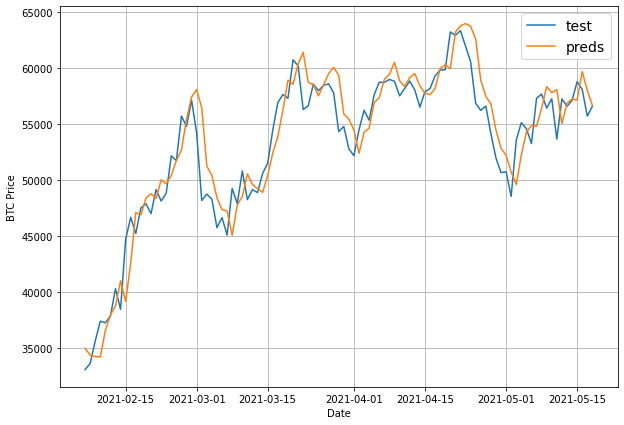

In [ ]:
plot(model3_preds)

In [ ]:
HORIZON = 1
WINDOWS = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
train_windows, train_labels, test_windows, test_labels = make_train_test_split(full_windows, full_labels)

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))

In [ ]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    layers.Conv1D(filters = 128, kernel_size = 5, strides = 1, padding = "causal", activation = "relu"),
    layers.Dense(HORIZON)
], name = "model4")

model4.compile(loss = "mae",
               optimizer = tf.keras.optimizers.Adam())

model4.fit(train_windows,
           train_labels,
           batch_size = 128,
           epochs = 100,
           verbose = 1,
           validation_data = (test_windows, test_labels),
           callbacks = create_model_checkpoint(model_name = model4.name))

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1448.0679

18/18 [==============================] - 6s 72ms/step - loss: 1448.0679 - val_loss: 2211.4111
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 437.1839

18/18 [==============================] - 1s 65ms/step - loss: 408.5602 - val_loss: 1935.5304
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 336.6165

18/18 [==============================] - 1s 40ms/step - loss: 338.8789 - val_loss: 1625.9791
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 288.4253

18/18 [==============================] - 1s 38ms/step - loss: 288.4253 - val_loss: 1429.7839
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 256.7772

18/18 [==============================] - 1s 38ms/step - loss: 258.6865 - val_loss: 1212.6880
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 224.2349

18/18 [==============================] - 1s 38ms/step - loss: 223.1860 - val_loss: 1151.9337
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 202.7017

18/18 [==============================] - 1s 37ms/step - loss: 203.0646 - val_loss: 1086.2246
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 190.8056 - val_loss: 1159.8503
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 186.6579

18/18 [==============================] - 1s 37ms/step - loss: 186.6579 - val_loss: 1035.6786
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 179.7267

18/18 [==============================] - 1s 37ms/step - loss: 179.0093 - val_loss: 963.0295
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 172.5504

18/18 [==============================] - 1s 39ms/step - loss: 171.4398 - val_loss: 936.2332
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 166.0070

18/18 [==============================] - 1s 39ms/step - loss: 165.6113 - val_loss: 907.4137
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 165.2351 - val_loss: 964.8120
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 160.1754

18/18 [==============================] - 1s 37ms/step - loss: 160.1754 - val_loss: 876.8640
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 167.3132 - val_loss: 1236.1560
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 198.1948 - val_loss: 1063.7524
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 162.5601 - val_loss: 910.3600
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 149.7843

18/18 [==============================] - 1s 58ms/step - loss: 149.8887 - val_loss: 845.3442
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 148.8943 - val_loss: 1032.1431
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 154.2713 - val_loss: 846.1763
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 151.3954

18/18 [==============================] - 1s 41ms/step - loss: 152.4091 - val_loss: 809.9600
Epoch 22/100
16/18 [=========================>....] - ETA: 0s - loss: 145.9698

18/18 [==============================] - 1s 46ms/step - loss: 143.2718 - val_loss: 800.4088
Epoch 23/100
18/18 [==============================] - 0s 8ms/step - loss: 146.5325 - val_loss: 1015.0629
Epoch 24/100
18/18 [==============================] - 0s 8ms/step - loss: 149.3162 - val_loss: 818.8011
Epoch 25/100
18/18 [==============================] - 0s 8ms/step - loss: 146.9478 - val_loss: 815.4819
Epoch 26/100
13/18 [====================>.........] - ETA: 0s - loss: 138.8924

18/18 [==============================] - 1s 56ms/step - loss: 138.9440 - val_loss: 775.6119
Epoch 27/100
18/18 [==============================] - 0s 8ms/step - loss: 141.9708 - val_loss: 780.0671
Epoch 28/100
18/18 [==============================] - 0s 8ms/step - loss: 139.5282 - val_loss: 1025.9716
Epoch 29/100
12/18 [===================>..........] - ETA: 0s - loss: 161.6822

18/18 [==============================] - 1s 42ms/step - loss: 158.3164 - val_loss: 748.8591
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 137.1028 - val_loss: 1006.6479
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 144.0723

18/18 [==============================] - 1s 39ms/step - loss: 144.2097 - val_loss: 741.4493
Epoch 32/100
15/18 [========================>.....] - ETA: 0s - loss: 141.3003

18/18 [==============================] - 1s 39ms/step - loss: 141.3959 - val_loss: 736.5616
Epoch 33/100
17/18 [===========================>..] - ETA: 0s - loss: 139.8174

18/18 [==============================] - 1s 39ms/step - loss: 139.6543 - val_loss: 731.8067
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 132.2652 - val_loss: 791.9821
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 153.9451 - val_loss: 843.4497
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 137.6102 - val_loss: 857.1313
Epoch 37/100
17/18 [===========================>..] - ETA: 0s - loss: 144.2133

18/18 [==============================] - 1s 44ms/step - loss: 143.4901 - val_loss: 713.6511
Epoch 38/100
18/18 [==============================] - 0s 8ms/step - loss: 138.4414 - val_loss: 729.0391
Epoch 39/100
18/18 [==============================] - 0s 8ms/step - loss: 133.2016 - val_loss: 775.3880
Epoch 40/100
12/18 [===================>..........] - ETA: 0s - loss: 142.2831

18/18 [==============================] - 1s 58ms/step - loss: 146.4872 - val_loss: 711.7087
Epoch 41/100
13/18 [====================>.........] - ETA: 0s - loss: 146.7572

18/18 [==============================] - 1s 66ms/step - loss: 144.8854 - val_loss: 705.6777
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 130.1511 - val_loss: 728.7656
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 127.1583 - val_loss: 817.3702
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 138.1306 - val_loss: 709.1606
Epoch 45/100
16/18 [=========================>....] - ETA: 0s - loss: 133.9466

18/18 [==============================] - 1s 41ms/step - loss: 134.8795 - val_loss: 697.9612
Epoch 46/100
17/18 [===========================>..] - ETA: 0s - loss: 127.0380

18/18 [==============================] - 1s 39ms/step - loss: 127.5431 - val_loss: 684.1217
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 131.6637 - val_loss: 881.3442
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 151.2014 - val_loss: 684.3608
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 128.0572 - val_loss: 685.2562
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 133.0246 - val_loss: 739.3397
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 126.4659 - val_loss: 781.1973
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 127.1393 - val_loss: 697.8351
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 131.2407 - val_loss: 732.3970
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 127.7799 - val_loss: 789.3289
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 13

18/18 [==============================] - 1s 48ms/step - loss: 126.4846 - val_loss: 651.8618
Epoch 63/100
18/18 [==============================] - 0s 9ms/step - loss: 119.0592 - val_loss: 772.5355
Epoch 64/100
18/18 [==============================] - 0s 8ms/step - loss: 121.0397 - val_loss: 692.5334
Epoch 65/100
13/18 [====================>.........] - ETA: 0s - loss: 122.7465

18/18 [==============================] - 1s 56ms/step - loss: 122.5723 - val_loss: 647.0138
Epoch 66/100
18/18 [==============================] - 0s 8ms/step - loss: 121.5789 - val_loss: 679.0002
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 127.2985 - val_loss: 698.7326
Epoch 68/100
12/18 [===================>..........] - ETA: 0s - loss: 124.5099

18/18 [==============================] - 1s 42ms/step - loss: 124.9046 - val_loss: 636.3953
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 128.9123 - val_loss: 644.7667
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 129.7469 - val_loss: 667.3948
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 123.5900 - val_loss: 637.5847
Epoch 72/100
16/18 [=========================>....] - ETA: 0s - loss: 118.2225

18/18 [==============================] - 1s 39ms/step - loss: 118.6283 - val_loss: 630.2902
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 119.2219 - val_loss: 631.7315
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 121.1045 - val_loss: 639.9215
Epoch 75/100
17/18 [===========================>..] - ETA: 0s - loss: 138.0439

18/18 [==============================] - 1s 37ms/step - loss: 138.1104 - val_loss: 624.5699
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 132.2880 - val_loss: 696.3489
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 126.1947 - val_loss: 778.5433
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 135.8609 - val_loss: 626.5129
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 128.5375 - val_loss: 730.8029
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 127.7884 - val_loss: 1012.8856
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 140.5901 - val_loss: 691.8877
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 121.3699 - val_loss: 810.0199
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 124.7209 - val_loss: 633.6532
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 1

18/18 [==============================] - 1s 39ms/step - loss: 125.5423 - val_loss: 612.3351
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 115.1711 - val_loss: 615.8219
Epoch 99/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3384 - val_loss: 631.9980
Epoch 100/100
17/18 [===========================>..] - ETA: 0s - loss: 121.6358

18/18 [==============================] - 1s 37ms/step - loss: 121.6749 - val_loss: 611.8760


In [ ]:
model4 = tf.keras.models.load_model("/content/model_experiments/model4")
model4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 611.8762


611.8761596679688

In [ ]:
model4_preds = make_preds(model4, test_windows)
model4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                y_pred = model4_preds)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model4_results

{'mae: ': 611.87616,
 'mse: ': 1308221.5,
 'rmse: ': 1143.7751,
 'mape: ': 2.7627497,
 'mase: ': 1.0695655}

In [ ]:
tf.random.set_seed(42)

inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(128, activation="relu")(x)
#x = layers.Dense(32, activation = "relu")(x)
outputs = layers.Dense(HORIZON)(x)

model5 = tf.keras.Model(inputs, outputs, name = "model5")

model5.compile(loss = "mae",
               optimizer = tf.keras.optimizers.Adam())

model5.fit(train_windows,
           train_labels,
           batch_size = 128,
           epochs = 100,
           verbose = 1,
           validation_data = (test_windows, test_labels),
           callbacks = create_model_checkpoint(model_name = model5.name))         

Epoch 1/100
18/18 [==============================] - 4s 150ms/step - loss: 1438.3020 - val_loss: 3002.4836
Epoch 2/100
18/18 [==============================] - 2s 111ms/step - loss: 520.2538 - val_loss: 2049.4954
Epoch 3/100
18/18 [==============================] - 2s 119ms/step - loss: 416.8913 - val_loss: 1955.1329
Epoch 4/100
18/18 [==============================] - 2s 100ms/step - loss: 384.2865 - val_loss: 1832.1572
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 337.2412 - val_loss: 1896.7648
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 309.9248 - val_loss: 1969.2898
Epoch 7/100
18/18 [==============================] - 2s 104ms/step - loss: 285.6806 - val_loss: 1437.0583
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 266.6220 - val_loss: 2328.4778
Epoch 9/100
18/18 [==============================] - 2s 101ms/step - loss: 280.2168 - val_loss: 1314.0302
Epoch 10/100
18/18 [==============================]

In [ ]:
model5 = tf.keras.models.load_model("/content/model_experiments/model5")
model5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 646.6122


646.6121826171875

In [ ]:
model5_preds = make_preds(model5, test_windows)
model5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                y_pred = model5_preds)
model5_results

18/18 [==============================] - 0s 3ms/step


{'mae: ': 646.6121,
 'mse: ': 1434881.4,
 'rmse: ': 1197.8654,
 'mape: ': 2.8819575,
 'mase: ': 1.1302843}

In [ ]:
block_reward_1 = 50 # 3 - January - 2009
block_reward_2 = 25 # 8 - November - 2012
block_reward_3 = 12.5 # 9 - July - 2016
block_reward_4 = 6.25 # 18 - May - 2020

block_reward_2_datetime = np.datetime64("2012-11-08")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

In [ ]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

In [ ]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.tail()

,Closing Price (USD),block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


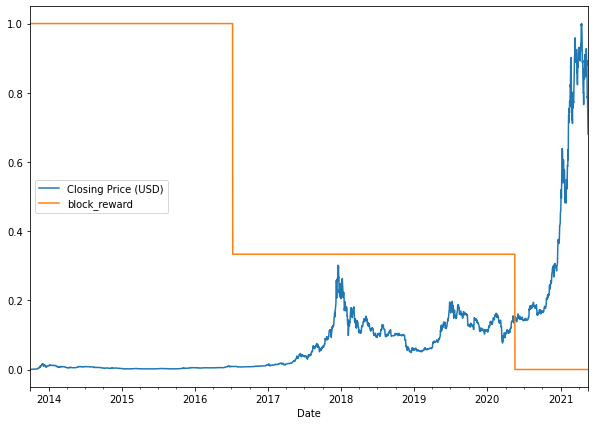

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Closing Price (USD)", "block_reward"]]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize = (10,7))

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Closing Price (USD)"].shift(periods=i+1)
bitcoin_prices_windowed[:7]

,Closing Price (USD),block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN


In [ ]:
X = bitcoin_prices_windowed.dropna().drop("Closing Price (USD)", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Closing Price (USD)"].astype(np.float32)

In [ ]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Closing Price (USD), dtype: float32

In [ ]:
split_size = int(len(X)*0.8)
X_train,y_train = X[:split_size],y[:split_size]
X_test,y_test = X[split_size:],y[split_size:]

In [ ]:
tf.random.set_seed(42)

model6=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(HORIZON)
],name="model6")

model6.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

model6.fit(X_train,y_train,
           epochs = 100,
           batch_size=128,
           validation_data=(X_test,y_test),
           callbacks = create_model_checkpoint(model_name = model6.name))

Epoch 1/100
 1/18 [>.............................] - ETA: 19s - loss: 4446.7661

18/18 [==============================] - 2s 41ms/step - loss: 1690.9034 - val_loss: 3271.8958
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 354.9392

18/18 [==============================] - 1s 54ms/step - loss: 354.9392 - val_loss: 1068.9857
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 138.0239

18/18 [==============================] - 1s 34ms/step - loss: 208.9690 - val_loss: 1026.5787
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 233.2860

18/18 [==============================] - 1s 34ms/step - loss: 188.7081 - val_loss: 990.6508
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 181.5316 - val_loss: 1010.2639
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 132.4377

18/18 [==============================] - 1s 34ms/step - loss: 173.1536 - val_loss: 935.5892
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 210.4268

18/18 [==============================] - 1s 33ms/step - loss: 166.4114 - val_loss: 903.3731
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 139.4062

18/18 [==============================] - 1s 33ms/step - loss: 161.0240 - val_loss: 884.1116
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 137.0593

18/18 [==============================] - 1s 33ms/step - loss: 159.7089 - val_loss: 837.0584
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 160.9864

18/18 [==============================] - 1s 34ms/step - loss: 152.9087 - val_loss: 807.5661
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 145.1031 - val_loss: 819.4172
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 141.2864 - val_loss: 915.0969
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 146.6953 - val_loss: 810.7761
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 134.1333

18/18 [==============================] - 1s 33ms/step - loss: 137.0685 - val_loss: 731.0556
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 124.6772

18/18 [==============================] - 1s 33ms/step - loss: 140.0275 - val_loss: 713.1813
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 115.0457

18/18 [==============================] - 1s 33ms/step - loss: 128.7196 - val_loss: 704.0179
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 128.4563 - val_loss: 711.4738
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 140.0163

18/18 [==============================] - 1s 33ms/step - loss: 126.4491 - val_loss: 678.0435
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 127.0947 - val_loss: 759.8796
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 126.4193 - val_loss: 703.1581
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 129.7831

18/18 [==============================] - 1s 48ms/step - loss: 129.7831 - val_loss: 645.3775
Epoch 22/100
18/18 [==============================] - 0s 8ms/step - loss: 121.8284 - val_loss: 671.4220
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 121.5315 - val_loss: 664.6945
Epoch 24/100
18/18 [==============================] - 0s 8ms/step - loss: 121.2146 - val_loss: 665.5414
Epoch 25/100
14/18 [======================>.......] - ETA: 0s - loss: 119.7450

18/18 [==============================] - 1s 51ms/step - loss: 117.4957 - val_loss: 623.3124
Epoch 26/100
11/18 [=================>............] - ETA: 0s - loss: 116.8041

18/18 [==============================] - 1s 58ms/step - loss: 116.1457 - val_loss: 619.2026
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5132 - val_loss: 756.4421
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 126.9429 - val_loss: 652.0401
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 107.8246

18/18 [==============================] - 1s 34ms/step - loss: 117.3488 - val_loss: 607.8242
Epoch 30/100
18/18 [==============================] - ETA: 0s - loss: 130.0609

18/18 [==============================] - 1s 35ms/step - loss: 130.0609 - val_loss: 606.0233
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 111.9714 - val_loss: 630.3546
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 113.7617

18/18 [==============================] - 1s 34ms/step - loss: 113.7617 - val_loss: 602.1289
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 112.5660 - val_loss: 602.2794
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 122.0251

18/18 [==============================] - 1s 33ms/step - loss: 114.3946 - val_loss: 595.5314
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1643 - val_loss: 671.7026
Epoch 36/100
16/18 [=========================>....] - ETA: 0s - loss: 115.8368

18/18 [==============================] - 1s 34ms/step - loss: 115.4452 - val_loss: 592.3299
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2118 - val_loss: 627.7435
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3295 - val_loss: 598.3752
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 113.0735 - val_loss: 595.0073
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 106.6086

18/18 [==============================] - 1s 35ms/step - loss: 109.5770 - val_loss: 587.7469
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5757 - val_loss: 601.7795
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 116.6622 - val_loss: 705.0762
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 117.8415 - val_loss: 664.5167
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 76.2140

18/18 [==============================] - 1s 34ms/step - loss: 110.4011 - val_loss: 583.3439
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4692 - val_loss: 691.8180
Epoch 46/100
18/18 [==============================] - 0s 8ms/step - loss: 111.9555 - val_loss: 726.8408
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6592 - val_loss: 631.5545
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5807 - val_loss: 598.3771
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 113.2529 - val_loss: 638.9650
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 116.5827 - val_loss: 689.4370
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2103 - val_loss: 584.1874
Epoch 52/100
16/18 [=========================>....] - ETA: 0s - loss: 113.9068

18/18 [==============================] - 1s 32ms/step - loss: 113.6151 - val_loss: 581.0103
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 61.7540

18/18 [==============================] - 1s 33ms/step - loss: 114.6848 - val_loss: 578.0919
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8644 - val_loss: 612.9782
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 125.3942 - val_loss: 592.6994
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 121.1983 - val_loss: 903.1182
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 140.6691 - val_loss: 704.5355
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 120.7783 - val_loss: 652.9551
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 115.1852 - val_loss: 684.6866
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 120.8406 - val_loss: 783.3750
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 122.3413 - val_loss: 622.1964
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 11

18/18 [==============================] - 1s 34ms/step - loss: 108.7334 - val_loss: 576.4832
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 113.5309 - val_loss: 721.1987
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 119.7846 - val_loss: 627.0568
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 108.7236 - val_loss: 591.7364
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 116.4219 - val_loss: 648.0840
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 111.6187 - val_loss: 582.1288
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 109.3543 - val_loss: 597.8795
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 110.9549 - val_loss: 580.0872
Epoch 76/100
12/18 [===================>..........] - ETA: 0s - loss: 113.6792

18/18 [==============================] - 1s 50ms/step - loss: 112.3798 - val_loss: 572.1852
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 106.8308 - val_loss: 575.2376
Epoch 78/100
18/18 [==============================] - 0s 8ms/step - loss: 108.0759 - val_loss: 592.4840
Epoch 79/100
18/18 [==============================] - 0s 8ms/step - loss: 108.1601 - val_loss: 588.7045
Epoch 80/100
18/18 [==============================] - 0s 8ms/step - loss: 111.4994 - val_loss: 656.7543
Epoch 81/100
13/18 [====================>.........] - ETA: 0s - loss: 107.8634

18/18 [==============================] - 1s 36ms/step - loss: 111.5527 - val_loss: 568.3763
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 116.1394 - val_loss: 701.9102
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 124.6238 - val_loss: 689.6901
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 118.6642 - val_loss: 655.2018
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6776 - val_loss: 611.7031
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6497 - val_loss: 583.6740
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1352 - val_loss: 627.0995
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8920 - val_loss: 580.2567
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9609 - val_loss: 607.7866
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 10

18/18 [==============================] - 1s 52ms/step - loss: 117.5256 - val_loss: 566.5085
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2023 - val_loss: 585.9236
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3585 - val_loss: 568.8984
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9537 - val_loss: 623.1877
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 110.4920 - val_loss: 605.6930
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 106.5870 - val_loss: 570.4382
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0401 - val_loss: 583.0583
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9649 - val_loss: 603.6516


In [ ]:
model6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 603.6516


603.651611328125

In [ ]:
model6=tf.keras.models.load_model("/content/model_experiments/model6")

In [ ]:
model6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 566.5084


566.5083618164062

In [ ]:
model6_preds = tf.squeeze(model6.predict(X_test))
model6_results = evaluate_preds(y_true=y_test,
                                y_pred = model6_preds)
model6_results

18/18 [==============================] - 0s 2ms/step


{'mae: ': 566.5083,
 'mse: ': 1166781.8,
 'rmse: ': 1080.1768,
 'mape: ': 2.543672,
 'mase: ': 0.9951982}

In [ ]:
model1_results

{'mae: ': 565.8549,
 'mse: ': 1160296.5,
 'rmse: ': 1077.1707,
 'mape: ': 2.541356,
 'mase: ': 0.9940504}

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers:int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size=input_size
    self.theta_size=theta_size
    self.horizon=horizon
    self.n_neurons=n_neurons
    self.n_layers=n_layers
    
    self.hidden = [tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear")

  def call(self,inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x) 
    backcast,forecast = theta[:,:self.input_size], theta[:,-self.horizon:]
    return backcast,forecast

In [ ]:
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
dummy_input = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_input

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast, forecast = dummy_nbeats_block_layer(dummy_input)
print(f"Backcast:{tf.squeeze(backcast.numpy())}")
print(f"Forecast:{tf.squeeze(forecast.numpy())}")

Backcast:[-0.751688    0.548139    0.22963297  0.40966737  0.10407624 -0.43412346
 -0.63943446]
Forecast:-0.36978036165237427


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Closing Price (USD)"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Closing Price (USD),Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X = bitcoin_prices_nbeats.dropna().drop("Closing Price (USD)", axis=1)
y = bitcoin_prices_nbeats.dropna()["Closing Price (USD)"]

In [ ]:
split_size = int(len(X)*0.8)
X_train,y_train,X_test,y_test = X[:split_size],y[:split_size],X[split_size:],y[split_size:]

In [ ]:
len(X_train)

2224

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset=tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset=tf.data.Dataset.from_tensor_slices(y_test)

In [ ]:
train_dataset=tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset=tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

In [ ]:
BATCH_SIZE=1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE*HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
tensor1 = tf.range(10)+10
tensor2 = tf.range(10)

In [ ]:
subtracted = layers.subtract([tensor1, tensor2])
added = layers.add([tensor1,tensor2])

In [ ]:
%%time

tf.random.set_seed(42)

#step 1
nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")
#step2
stack_input = layers.Input(shape=(INPUT_SIZE),name="stack_input")

#step3
residuals, forecast = nbeats_block_layer(stack_input)

#step4
for i,_ in enumerate(range(N_STACKS-1)):
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)

#step5
  residuals = layers.subtract([residuals,backcast],name=f"subtract{i}")
  forecast = layers.add([forecast,block_forecast],name=f"add_{i}")

#step6
model7 = tf.keras.Model(inputs=stack_input,outputs=forecast, name="model7")

#step7
model7.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

#step8
model7.fit(train_dataset,
           epochs=N_EPOCHS,
           validation_data=test_dataset,
           verbose=0,
           callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                         patience=200,
                                                         restore_best_weights=True),
                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                             patience=100,
                                                             verbose=1)])


Epoch 796: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1001: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1101: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 4min 27s, sys: 7.05 s, total: 4min 34s
Wall time: 5min 10s


In [ ]:
model7.evaluate(test_dataset)

1/1 [==============================] - 0s 25ms/step - loss: 575.8149


575.8148803710938

In [ ]:
model7_preds = make_preds(model7,test_dataset)
model7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8850.995, 8777.564, 9002.676, 8773.332, 8744.43 , 8706.468,
       8669.334, 8504.727, 8455.401, 8504.546], dtype=float32)>

In [ ]:
model7_results = evaluate_preds(y_true=y_test,
                                y_pred=model7_preds)
model7_results

{'mae: ': 575.8149,
 'mse: ': 1175116.5,
 'rmse: ': 1084.028,
 'mape: ': 2.6470857,
 'mase: ': 1.0115472}

In [ ]:
model1_results

{'mae: ': 565.8549,
 'mse: ': 1160296.5,
 'rmse: ': 1077.1707,
 'mape: ': 2.541356,
 'mase: ': 0.9940504}

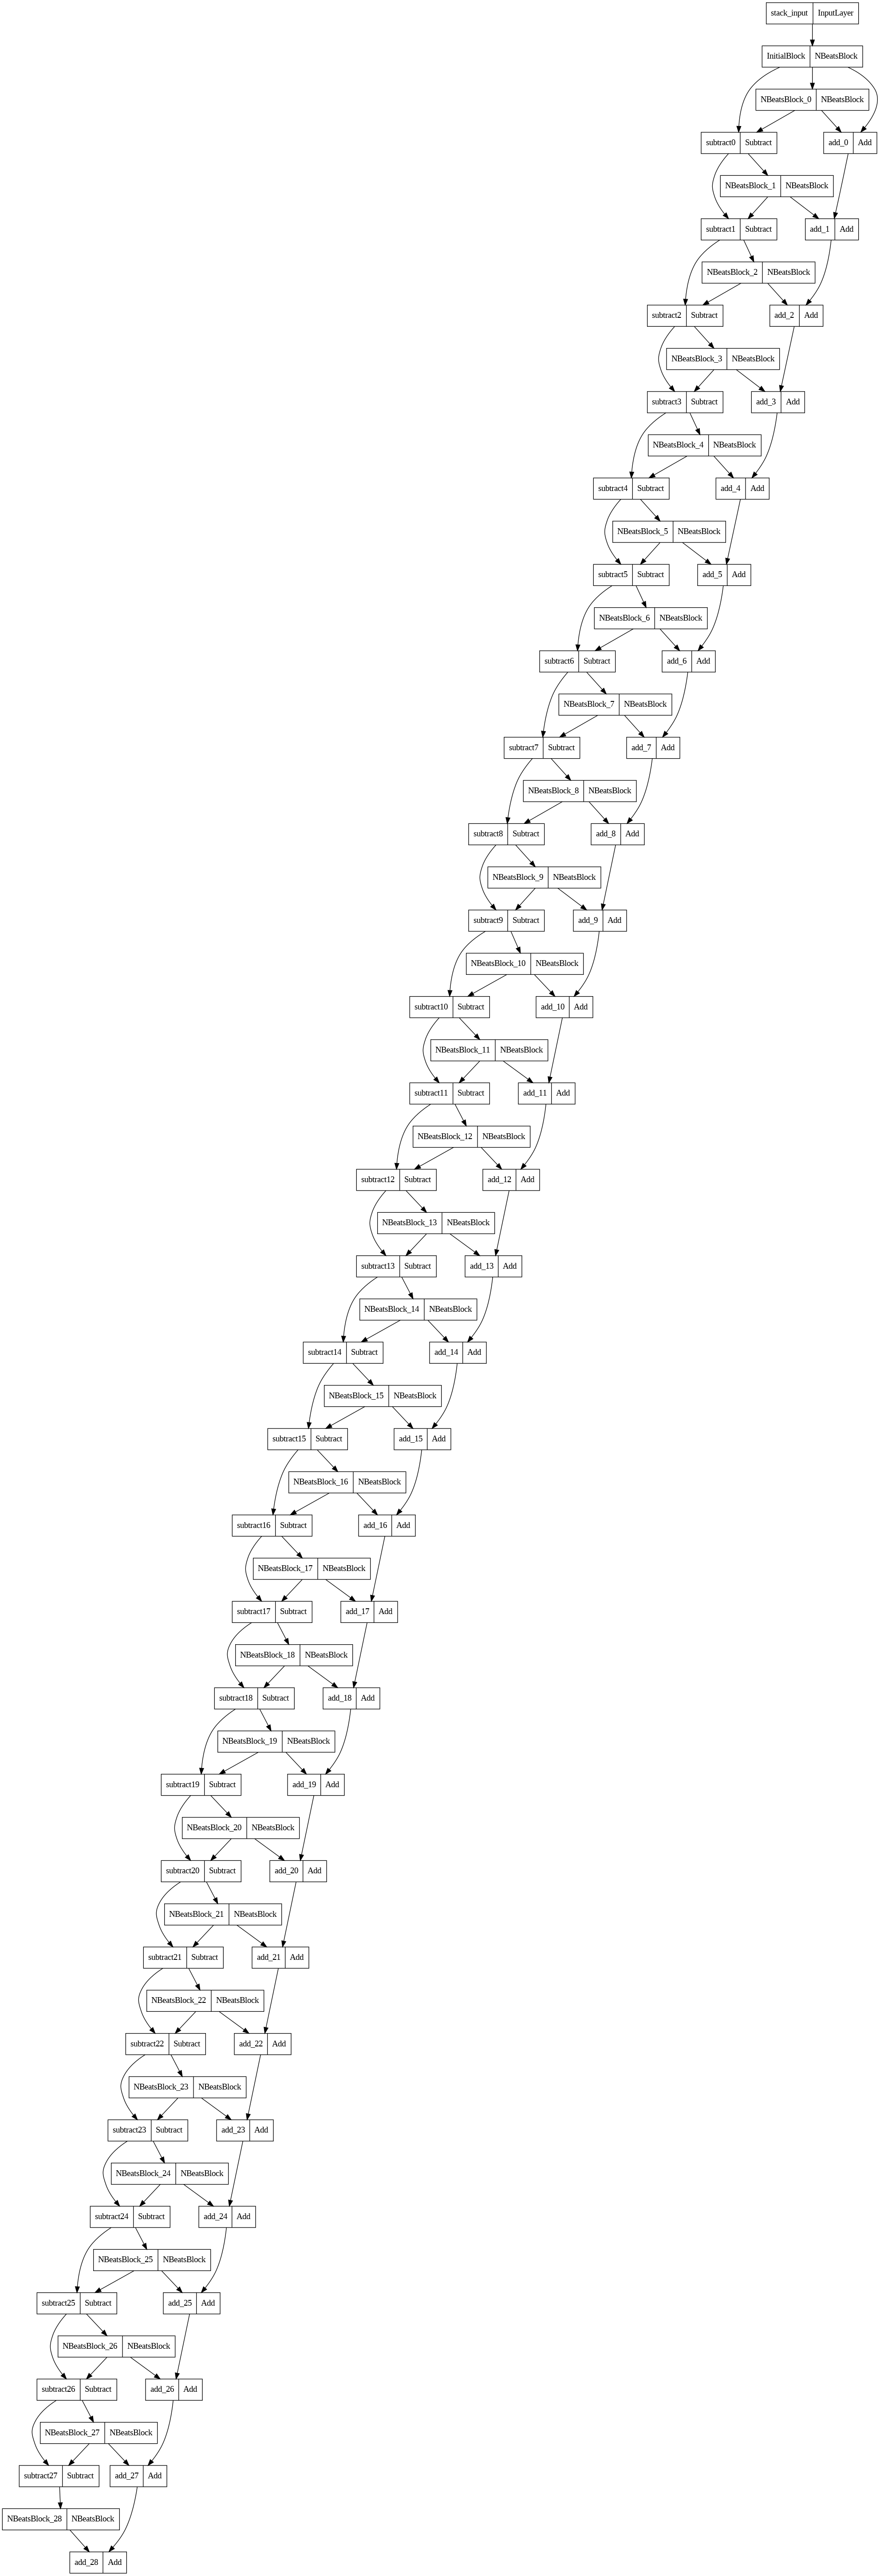

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model7)

In [ ]:
HORIZON,WINDOW_SIZE

(1, 7)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae","mse","mape"]):
  ensemble_models = []
  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"optimizing: {loss_function} for {num_epochs} model number {i}")
      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])
    model.compile(loss=loss_function,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mae","mse"])
    model.fit(train_data,
             epochs=num_epochs,
             verbose=0,
             validation_data=test_data,
             callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)]) 
    ensemble_models.append(model)
  return ensemble_models

In [ ]:
%%time

ensemble_model = get_ensemble_models(num_iter=5,
                                     num_epochs=1000)

optimizing: mae for 1000 model number 0
optimizing: mse for 1000 model number 0
optimizing: mape for 1000 model number 0

Epoch 314: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 414: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing: mae for 1000 model number 1
optimizing: mse for 1000 model number 1
optimizing: mape for 1000 model number 1

Epoch 165: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 265: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing: mae for 1000 model number 2
optimizing: mse for 1000 model number 2
optimizing: mape for 1000 model number 2

Epoch 253: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 353: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing: mae for 1000 model number 3
optimizing: mse for 1000 model number 3
optimizing: mape for 1000 model number 3

Epoch 244: ReduceLROnPlateau reduci

In [ ]:
def make_ensemble_preds(ensemble_models,data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_model,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 41ms/step
CPU times: user 248 ms, sys: 7.97 ms, total: 256 ms
Wall time: 277 ms


<tf.Tensor: shape=(5, 556), dtype=float32, numpy=
array([[ 8795.867,  8758.299,  9051.695, ..., 49670.715, 48082.676,
        45554.74 ],
       [ 8758.116,  8779.347,  9145.464, ..., 49646.56 , 48411.32 ,
        46992.926],
       [ 8809.619,  8808.082,  9096.484, ..., 49474.383, 49031.6  ,
        46537.734],
       [ 8800.887,  8739.874,  9020.489, ..., 50157.07 , 48219.895,
        46274.13 ],
       [ 8803.535,  8784.245,  9077.665, ..., 50195.934, 48025.94 ,
        45514.504]], dtype=float32)>

In [ ]:
ensemble_results=evaluate_preds(y_true=y_test,
                      y_pred=ensemble_preds)

In [ ]:
ensemble_results

{'mae: ': 574.8315,
 'mse: ': 1160732.1,
 'rmse: ': 1077.3254,
 'mape: ': 2.6140373,
 'mase: ': 1.0098197}

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=1)
ensemble_mean

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([20069.875, 20100.166, 20089.729, 20086.604, 20061.867],
      dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8800.887, 8779.347, 9077.665, 8700.837, 8759.51 , 8751.776,
       8643.764, 8474.428, 8472.893, 8523.073], dtype=float32)

In [ ]:
ensemble_results=evaluate_preds(y_true=y_test,
                      y_pred=ensemble_median)
ensemble_results

{'mae: ': 567.8025,
 'mse: ': 1137013.2,
 'rmse: ': 1066.3082,
 'mape: ': 2.5698514,
 'mase: ': 0.9974717}

In [ ]:
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds,axis=0)
  interval = 1.96*std
  preds_mean = tf.reduce_mean(preds,axis=0)
  lower,upper = preds_mean-interval,preds_mean+interval
  return lower,upper

In [ ]:
lower, upper = get_upper_lower(preds=ensemble_preds)
lower[:10], upper[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8757.757 , 8728.371 , 8995.704 , 8639.6455, 8662.812 , 8695.714 ,
        8588.909 , 8464.556 , 8414.103 , 8478.141 ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8829.454, 8819.568, 9161.015, 8765.415, 8818.556, 8826.503,
        8712.097, 8482.657, 8528.222, 8567.441], dtype=float32)>)

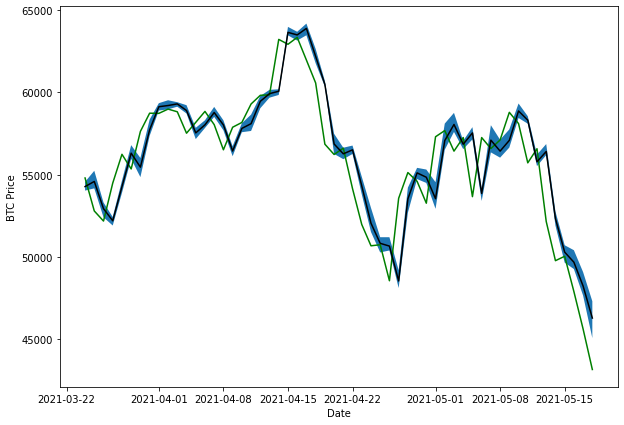

In [ ]:
ensemble_median = np.median(ensemble_preds,axis=0)
offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:],y_test[offset:],"g",label="test data")
plt.plot(X_test.index[offset:],ensemble_median[offset:],"k",label="ensemble median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed.head()

,Closing Price (USD),block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X_all = bitcoin_prices_windowed.dropna().drop(["Closing Price (USD)","block_reward"],axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Closing Price (USD)"].to_numpy()
len(X_all), len(y_all)

(2780, 2780)

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all,labels_dataset_all))
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

model9 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON),
],name="model9")

model9.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam())

model9.fit(dataset_all,
           epochs=100,
           verbose=0)

In [ ]:
INTO_FUTURE = 14


In [ ]:
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE)->list:
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(INTO_FUTURE):
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> {tf.squeeze(future_pred).numpy()} \n")
    future_forecast.append(tf.squeeze(future_pred).numpy())
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  return future_forecast

In [ ]:
future_forecast=make_future_forecasts(values=y_all,
                                     model=model9,
                                     into_future=INTO_FUTURE,
                                     window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 54ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> 55485.78515625 

1/1 [==============================] - 0s 21ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55485.78515625] -> 52234.60546875 

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55485.78515625 52234.60546875] -> 48255.23828125 

1/1 [==============================] - 0s 22ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55485.78515625 52234.60546875 48255.23828125] -> 49033.6328125 

1/1 [==============================] - 0s 21ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55485.78515625
 52234.60546875 48255.23828125 49033.6328125 ] -> 47005.80859375 

1/1 [===========

In [ ]:
future_forecast

[55485.785,
 52234.605,
 48255.24,
 49033.633,
 47005.81,
 45340.164,
 49469.348,
 54782.04,
 50288.32,
 47597.49,
 48328.188,
 46949.16,
 47962.496,
 52494.41]

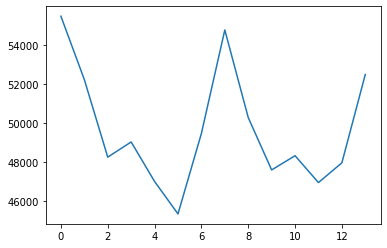

In [ ]:
plt.plot(future_forecast)

In [ ]:
def get_future_dates(start_date,into_future,offset=1):
  start_date = start_date + np.timedelta64(offset,"D")
  end_date = start_date + np.timedelta64(into_future,"D")
  return np.arange(start_date,end_date, dtype = "datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future = INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
next_time_steps = np.insert(next_time_steps,0,last_timestep)
future_forecast = np.insert(future_forecast,0,btc_price[-1])
next_time_steps,future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55485.785, 52234.605, 48255.24 , 49033.633, 47005.81 ,
        45340.164, 49469.348, 54782.04 , 50288.32 , 47597.49 , 48328.188,
        46949.16 , 47962.496, 52494.41 ], dtype=float32))

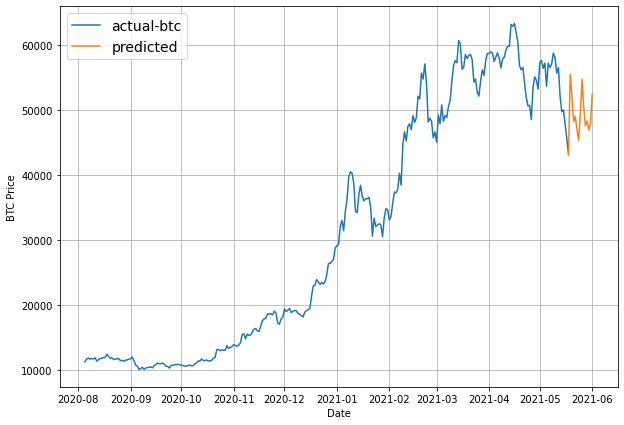

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index,btc_price, start=2500,format="-",label="actual-btc")
plot_time_series(next_time_steps,future_forecast, format="-",label="predicted")

In [ ]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [ ]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

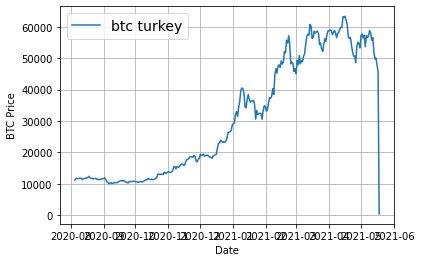

In [ ]:
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="btc turkey",
                 start=2500)

In [ ]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey),
                                         window_size = WINDOW_SIZE,
                                         horizon=HORIZON)
X_train, y_train, X_test, y_test = make_train_test_split(full_windows, full_labels)
len(X_train), len(X_test)

(2224, 556)

In [ ]:
turkey_model = tf.keras.models.clone_model(model1)
turkey_model.__name__ = "Turkey_Model10"
turkey_model.compile(loss="mae",
                     optimizer = tf.keras.optimizers.Adam())
turkey_model.fit(X_train,y_train,
                 epochs = 100,
                 verbose=1,
                 validation_data = (X_test,y_test),
                 callbacks = [create_model_checkpoint(turkey_model.name)])

Epoch 1/100
70/70 [==============================] - 3s 17ms/step - loss: 788.1220 - val_loss: 982.0323
Epoch 2/100
70/70 [==============================] - 1s 10ms/step - loss: 163.7942 - val_loss: 923.5858
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 162.7038 - val_loss: 885.0047
Epoch 4/100
70/70 [==============================] - 1s 15ms/step - loss: 145.6818 - val_loss: 847.1438
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 139.3673 - val_loss: 851.5832
Epoch 6/100
70/70 [==============================] - 1s 9ms/step - loss: 137.2810 - val_loss: 798.7615
Epoch 7/100
70/70 [==============================] - 1s 13ms/step - loss: 135.4016 - val_loss: 765.0721
Epoch 8/100
70/70 [==============================] - 0s 5ms/step - loss: 131.0396 - val_loss: 765.9232
Epoch 9/100
70/70 [==============================] - 0s 5ms/step - loss: 121.8061 - val_loss: 1005.1434
Epoch 10/100
70/70 [==============================] - 1s 12ms/step -

In [ ]:
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 5ms/step - loss: 690.7968


690.7968139648438

In [ ]:
turkey_preds = make_preds(turkey_model, X_test)
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

18/18 [==============================] - 0s 1ms/step


{'mae: ': 17024.934,
 'mse: ': 606786240.0,
 'rmse: ': 23505.693,
 'mape: ': 119.868324,
 'mase: ': 26.34614}

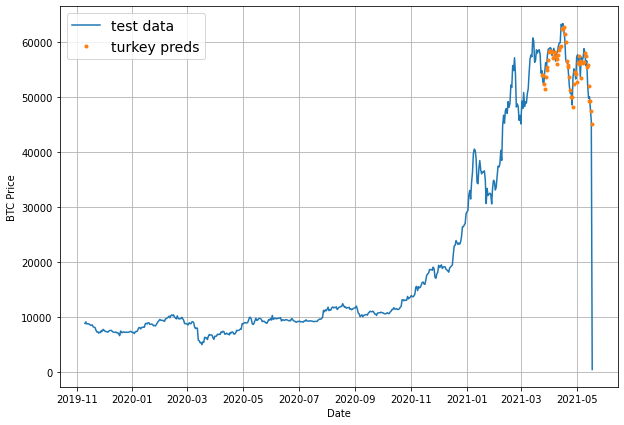

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="test data")
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds[-len(y_test):],
                 start=offset,
                 label="turkey preds")